In [48]:
# Goals for this notebook
# - create relational matrix heatmap to find out which other factors are correlated with churn
# - go through full data sheet and figure out not churned devices, do similar heatmap for non churn params
# Each sheet should be able to have a matrix like this, and a bar graph showing highest churn-correlated parameters

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
# load the excel sheet into a Dataframe
xls_file = pd.ExcelFile("./UW_Churn_Pred_Data.xls")
print(f"Sheet Names: {xls_file.sheet_names}")

# Create a dataframe of each sheet
data_df = pd.read_excel(xls_file, sheet_name="Data")

Sheet Names: ['Data', 'Legend', 'N10', 'B30 Pro', 'Data Before Feb 13']


In [ ]:
# Columns that could be used in correlation matrix (FOR 'DATA' SHEET ONLY):
# 'Type', 'Sale Channel', 'Model', 'Warranty', 'Customer Service Requested', 
# 'Number of Sim', 'Sim Country', 'Screen Usage (s)', 'Bluetooth (# of pairs)', 'Wallpaper',
# 'Registered Email', 'last boot - activate', 'last boot - interval'
# Columns need to be numeric

In [52]:
# Sale Channel - could create an int for each different type of sale channel
# Model - ^^
# Warranty - 1 = yes, and 0 = no, -1 for blank
# Sim Country - could parse for the number, and do 0 for uninserted/blank
# Wifi/Internet Connection - 1 for true, 0 for false, -1 for blank
# Registered Email - 1 true, 0 false, -1 unknown/blank

In [53]:
saleChannel_to_num = {}
model_to_num = {}
sim_to_num = {}
churn_to_num = {}

In [58]:
# Easy to make numeric for TRUE or FALSE columns
data_df['Warranty'] = data_df['Warranty'].replace({'Yes': 1, 'No': 0, '': -1, ' ': -1})
data_df['Wifi/Internet Connection'] = data_df['Wifi/Internet Connection'].replace({'TRUE': 1, 'FALSE': 0, True: 1, False: 0, '': -1, ' ': -1})
data_df['Registered Email'] = data_df['Registered Email'].replace({'TRUE': 1, 'FALSE': 0, True: 1, False: 0, '': -1, ' ': -1})

# For columns w/ lots of data, tricky to make numeric
# - add each item from list to dict as a key, with value being incrementing i
# - then do the replace, using the dictionary

# for sale channels
sale_channels = data_df['Sale Channel'].unique()
i = 0
for channel in sale_channels:
    saleChannel_to_num[channel] = i
    i += 1
data_df['Sale Channel'] = data_df['Sale Channel'].replace(saleChannel_to_num)

# for phone models
models = data_df['Model'].unique()
i = 0
for model in models:
    model_to_num[model] = i
    i += 1
data_df['Model'] = data_df['Model'].replace(model_to_num)

# for country sim cards
sims = data_df['Sim Country'].unique()
i = 0
for sim in sims:
    sim_to_num[sim] = i
    i += 1
data_df['Sim Country'] = data_df['Sim Country'].replace(sim_to_num)

# for churn
'''print(data_df.columns)
ret_types = data_df['Type'].unique()
i = 0
for action in ret_types:
    churn_to_num[action] = i
    i += 1
data_df['Type'] = data_df['Type'].replace(churn_to_num)'''
data_df['Type'] = data_df['Type'].replace({'Return': 1, 'Repair': 1}).fillna(0)


In [59]:
data_df = data_df[['Type', 'Sale Channel', 'Model', 'Warranty', 'Customer Service Requested', 'Number of Sim', 'Sim Country', 'Screen Usage (s)', 'Bluetooth (# of pairs)', 'Wifi/Internet Connection','Wallpaper', 'Registered Email', 'last boot - activate', 'last boot - interval']]
data_df.fillna(-1, inplace=True)

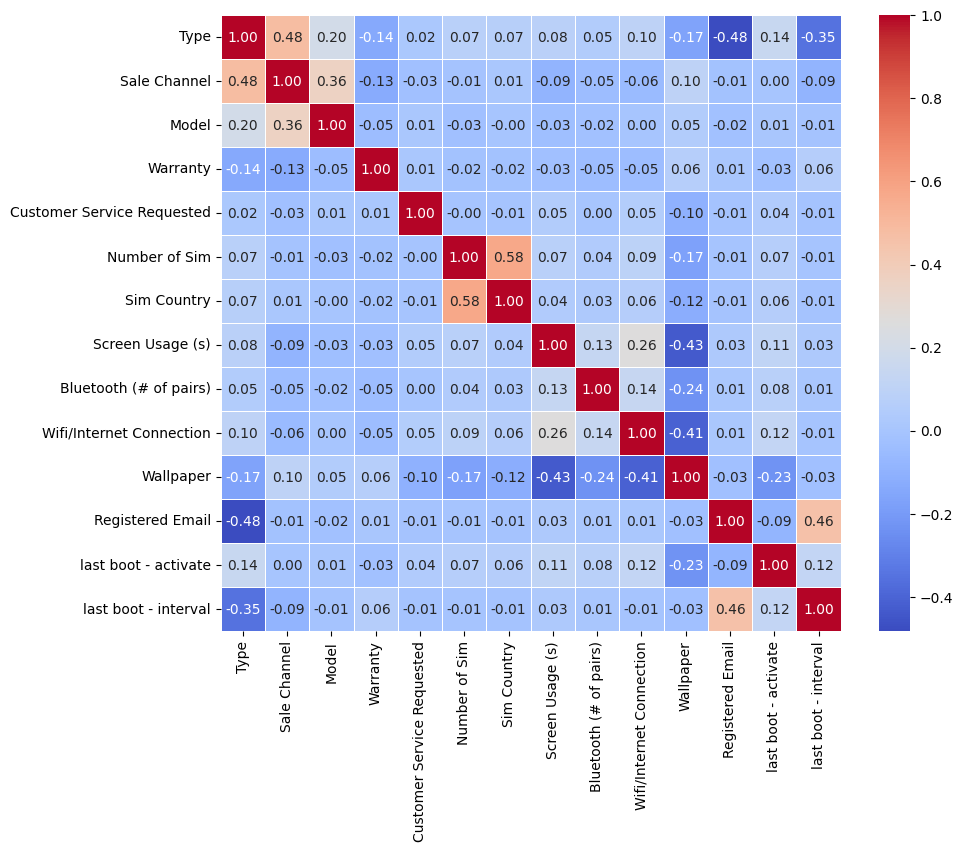

In [67]:
# Now with numeric df, make heat map
correlation_matrix = data_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

In [84]:
correlation_matrix = data_df.corr()['Type'].sort_values(ascending=False)
print(correlation_matrix.keys())
print(correlation_matrix)

Index(['Type', 'Sale Channel', 'Model', 'last boot - activate',
       'Wifi/Internet Connection', 'Screen Usage (s)', 'Number of Sim',
       'Sim Country', 'Bluetooth (# of pairs)', 'Customer Service Requested',
       'Warranty', 'Wallpaper', 'last boot - interval', 'Registered Email'],
      dtype='object')
Type                          1.000000
Sale Channel                  0.479107
Model                         0.197521
last boot - activate          0.144466
Wifi/Internet Connection      0.097299
Screen Usage (s)              0.083346
Number of Sim                 0.073739
Sim Country                   0.071804
Bluetooth (# of pairs)        0.049408
Customer Service Requested    0.019104
Warranty                     -0.136432
Wallpaper                    -0.168018
last boot - interval         -0.353021
Registered Email             -0.482844
Name: Type, dtype: float64


In [86]:
rounded_list = [round(num, 4) for num in correlation_matrix]
correlation_dict = dict(zip(correlation_matrix.keys(),rounded_list))
print(correlation_dict)

{'Type': 1.0, 'Sale Channel': 0.4791, 'Model': 0.1975, 'last boot - activate': 0.1445, 'Wifi/Internet Connection': 0.0973, 'Screen Usage (s)': 0.0833, 'Number of Sim': 0.0737, 'Sim Country': 0.0718, 'Bluetooth (# of pairs)': 0.0494, 'Customer Service Requested': 0.0191, 'Warranty': -0.1364, 'Wallpaper': -0.168, 'last boot - interval': -0.353, 'Registered Email': -0.4828}
